In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

1. Download the data file above and read it into a pandas DataFrame

In [36]:
homes = pd.read_csv('homes.csv')
homes.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


2. Add the code necessary to describe the dataset

In [12]:
homes.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


3. Using markdown commentary describe the dataset

This dataset consists of 50 properties with 8 features related to their size, amenities, and financial aspects. The 8 variables are the following:

- Sell: The average selling price of properties in the dataset is approximately 170.36 thousand dollars, with a standard deviation of 72.76 thousand dollars. The minimum selling price is 87 thousand dollars, and the maximum selling price is 567 thousand dollars.

- List: The average listing price is approximately 178.34 thousand dollars, with a standard deviation of 79.38 thousand dollars. The minimum listing price is 90 thousand dollars, and the maximum listing price is 625 thousand dollars.

- Living: The average living area size is approximately 21.12 square units, with a standard deviation of 8.35. The living area ranges from 10 to 64 square units.

- Rooms: The average number of rooms is approximately 8.06, with a standard deviation of 1.28. The minimum number of rooms of the properties in this dataset is 5, and the maximum is 12.

- Beds: The average number of beds is approximately 3.82, with a standard deviation of 0.69. The number of beds in the properties in the dataset ranges from 3 to 6 bedrooms.

- Baths: The average number of bathrooms is approximately 1.86, with a standard deviation of 0.76. The dataset contains properties with 1 to 4 bathrooms.

- Age: The average age of the properties is approximately 30.22 years, with a standard deviation of 30.96 years. The properties range in age from 2 to 202 years.

- Acres: The average land area is approximately 1.0206 acres, with a standard deviation of 1.1915 acres. The land area varies from 0.22 to 6.49 acres.

- Taxes: The average property tax is approximately 3706.1 dollars, with a standard deviation of 1579.92 dollars.

4. Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis

In [34]:
# EDA 1

# Calculating correlations between numeric variables
homes.corr()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
"""List""",0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
"""Living""",0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
"""Rooms""",0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
"""Beds""",0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
"""Baths""",0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
"""Age""",-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
"""Acres""",0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
"""Taxes""",0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


This matrix shows the correlation coefficients between numeric variables to understand the relationships between them.

Observations:
- Sell vs List Prices: The 'Sell' prices have a very strong positive correlation with 'List' prices (0.997). This indicates that as the list price increases, the selling price also tends to increase, as it would be expected.
- Sell vs Living Area: There is a strong positive correlation between 'Sell' prices and the 'Living' area size (0.879). This suggests that properties with larger living areas tend to have higher selling prices.
- Sell vs Age: There is a weak negative correlation between 'Sell' prices and the 'Age' of the properties (-0.147). This implies that newer properties may fetch slightly higher selling prices compared to older ones, although the correlation is not very strong.
- Sell vs Taxes: 'Sell' prices have a strong positive correlation with 'Taxes' (0.899). This suggests that properties with higher tax amounts tend to have higher selling prices, which would be expected.

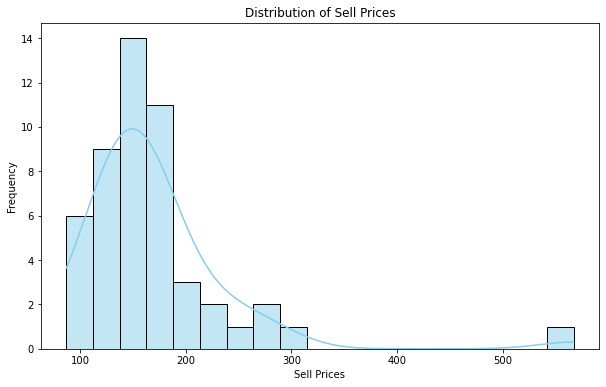

In [31]:
# EDA 2

# Plotting the distribution of 'Sell' prices
plt.figure(figsize=(10, 6))
sns.histplot(homes['Sell'], kde=True, color='skyblue')
plt.title('Distribution of Sell Prices')
plt.xlabel('Sell Prices')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of 'Sell' prices. This helps us understand the typical range and distribution of prices in the dataset.

Observations:
The distribution appears to be right-skewed, indicating that there are fewer properties with higher selling prices compared to lower selling prices. The upper range of prices might not be representative of the whole data set and shift the overall mean of the dataset.

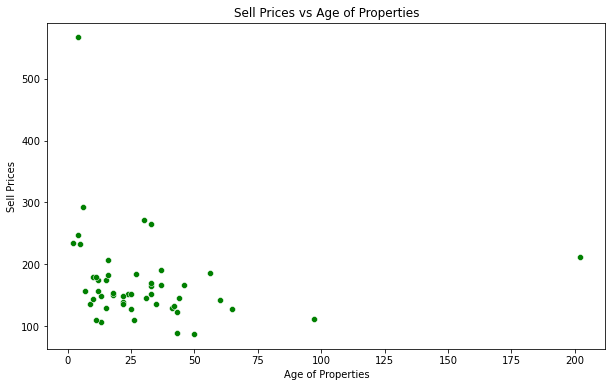

In [33]:
# EDA 3

# Plotting 'Sell' prices against 'Age' of the properties
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' "Age"', y='Sell', data=homes, color='green')
plt.title('Sell Prices vs Age of Properties')
plt.xlabel('Age of Properties')
plt.ylabel('Sell Prices')
plt.show()

This scatter plot shows the relationship between 'Sell' prices and the 'Age' of the properties. This helps identify if there's any discernible trend or pattern between these variables.

Observations:
There doesn't seem to be a clear linear relationship between 'Sell' prices and the 'Age' of properties. However, there might be some outliers, especially for newer properties with relatively higher selling prices.

5. Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model

In [17]:
print(homes.columns)

Index(['Sell', ' "List"', ' "Living"', ' "Rooms"', ' "Beds"', ' "Baths"',
       ' "Age"', ' "Acres"', ' "Taxes"'],
      dtype='object')


In [19]:
y = homes['Sell']
x = homes[' "Taxes"']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        15:46:16   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
 "Taxes"       0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

6. In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?

- R-squared and Adjusted R-squared: The R-squared value (0.809) indicates that approximately 80.9% of the variability in the 'Sell' prices can be explained by the linear regression model with 'Taxes' as the independent variable. The Adjusted R-squared value (0.805) is similar and accounts for the number of predictors in the model.
- The coefficient for the 'Taxes' variable is 0.0414, with a standard error of 0.003. The associated p-value is highly significant (p-value < 0.05), suggesting that the 'Taxes' variable is a statistically significant predictor of 'Sell' prices.

7. Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model?

In [35]:
y = homes['Sell']
x = homes[' "Living"']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.39e-17
Time:                        20:40:15   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.532     -18.749      35.856
 "Living"      7.6613      0.599     12.796      0.000       6.458       8.865
==============================================================================
Omnibus:                        3.798   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.793
Skew:                          -0.399   Prob(JB):                        0.247
Kurtosis:                       3.838   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared and Adjusted R-squared: The R-squared value for the model is 0.773, indicating that approximately 77.3% of the variability in the 'Sell' prices can be explained by the linear regression model with 'Living' area size as the independent variable.
- The coefficient for 'Living' area size is 7.6613, with a standard error of 0.599. The p-value associated is very low (0.000 < 0.05), suggesting that the 'Living' area size is a statistically significant predictor of 'Sell' prices.

Model comparison:

- The R-squared and Adjusted R-squared values are higher in Regression 1, indicating that Taxes explain more variability in Sell prices compared to Living area size in Regression 2.
- Both models have high F-statistics and very low p-values, indicating that both models are statistically significant. However, the F-statistic is higher in Regression 1, suggesting a stronger relationship between Taxes and Sell prices.

Based on these comparisons, Regression 1, with Taxes as the independent variable, appears to be "better" in terms of explaining the variability in Sell prices. However, it's important to note that the choice of the "better" model may also depend on other factors.

Possible limitations:

- Omitted Variables: Both models only include one independent variable. There may be other important variables not included in the models that could also influence 'Sell' prices. Omitting relevant variables can lead to biased and unreliable estimates.

- Assumptions of Linear Regression: Linear regression assumes linearity, independence, homoscedasticity, and normality of residuals. Violations of these assumptions can lead to inaccurate results and unreliable predictions.

- Model Fit: While both models have relatively high R-squared values, indicating a good fit to the data, there may still be unexplained variability in 'Sell' prices that the models do not capture.